In [20]:
import numpy as np 
import pandas as pd

In [21]:
import seaborn as sns


In [22]:
df=pd.read_csv('SalesPrediction.csv')
df.shape

(200, 4)

In [23]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [24]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<AxesSubplot:>

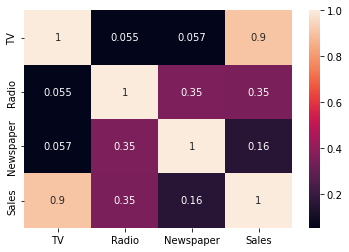

In [25]:
sns.heatmap(df.corr(),annot=True)


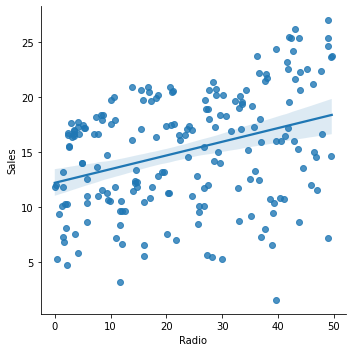

In [26]:
sns.lmplot(data=df,x='Radio',y="Sales")


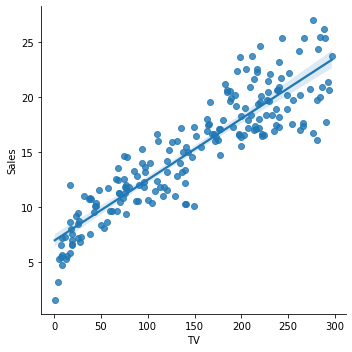

In [27]:
sns.lmplot(data=df,x='TV',y="Sales")


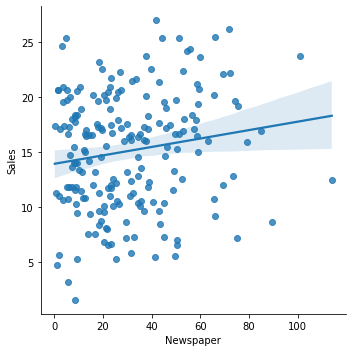

In [28]:
sns.lmplot(data=df,x='Newspaper',y="Sales")


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)

In [31]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [32]:
print(model.intercept_)
print(model.coef_)

4.617647152872291
[0.05404987 0.11139369 0.00270166]


In [33]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()
})
act_predict.head(20)

,Actual,Predict
0,11.3,10.690910
1,8.4,8.662018
2,12.0,9.599852
3,25.4,25.126174
4,16.7,14.780905
5,8.7,8.370433
6,7.2,10.737657
7,18.2,18.431700
8,9.2,9.991992
9,16.6,17.931739


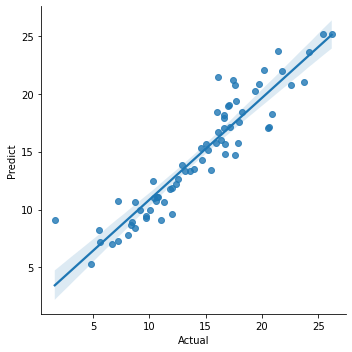

In [34]:
sns.lmplot(data=act_predict,x='Actual',y="Predict")


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score:",r2_score(y_test,y_predict))

Mean_absolute_error: 1.3099256339323175
Mean_squared_error: 3.600552597855906
Squre_Mean_absolute_error: 1.1445198267973855
r2_score: 0.8693105267585337


In [37]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  86.93105267585337
